## Libraries

In [1]:
!pip install emoji

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from torch.utils.data import DataLoader
from transformers import AdamW, get_scheduler
from sklearn.metrics import accuracy_score
import torch
from tqdm import trange
from datasets import load_dataset
import speech_recognition as sr
from IPython.display import Audio
import uuid
import subprocess
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install deep-translator
!pip install langdetect
!pip install faiss-gpu
!pip install googletrans
!pip install transformers datasets scikit-learn
!pip install faiss-gpu
!pip install SpeechRecognition

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing Milestone1

## Data 1 SocialMedia

In [ ]:
socialdata=pd.read_csv("/content/new_socialmedia_data.csv")
socialdata

,Text,Sentiment,Hashtags,Platform
0,enjoying beautiful day park,2,Nature Park,2
1,traffic terrible morning,0,Traffic Morning,2
2,finished amazing workout,2,Fitness Workout,1
3,excited upcoming weekend getaway,2,Travel Adventure,0
4,trying new recipe dinner tonight,1,Cooking Food,1
...,...,...,...,...
701,collaborating science project received recogni...,2,ScienceFairWinner HighSchoolScience,0
702,attending surprise birthday party organized fr...,2,SurpriseCelebration HighSchoolFriendship,1
703,successfully fundraising school charity initia...,2,CommunityGiving HighSchoolPhilanthropy,2
704,participating multicultural festival celebrati...,2,CulturalCelebration HighSchoolUnity,0


## Data 2 Twitter Sentiment Analysis

In [ ]:
train_main=pd.read_csv("/content/Twitter_Sentiment_Analysis_train.csv")
train_main

,GameTitle,label,text
0,borderlands,2,coming border kill
1,borderlands,2,im getting borderland kill
2,borderlands,2,im coming borderland murder
3,borderlands,2,im getting borderland 2 murder
4,borderlands,2,im getting borderland murder
...,...,...,...
63745,nvidia,2,realized window partition mac like 6 year behi...
63746,nvidia,2,realized mac window partition 6 year behind nv...
63747,nvidia,2,realized window partition mac 6 year behind nv...
63748,nvidia,2,realized window partition mac like 6 year behi...


In [ ]:
val_combined = pd.read_csv("/content/Twitter_Sentiment_Analysis_test.csv")
val_combined

,GameTitle,label,text
0,amazon,1,bbc news amazon bos jeff bezos reject claim co...
1,microsoft,0,microsoft pay word function poorly samsungus c...
2,cs-go,0,csgo matchmaking full closet hacking truly awf...
3,google,1,president slapping american face really commit...
4,fifa,0,hi eahelp ’ madeleine mccann cellar past 13 ye...
...,...,...,...
993,grandtheftauto(gta),1,toronto art culture capital canada ’ wonder wa...
994,cs-go,1,actually good move tot bring viewer one people...
995,borderlands,2,today sucked ’ time drink wine n play borderla...
996,microsoft,2,bought fraction microsoft today small win


In [ ]:
train_main.isnull().sum()

,0
GameTitle,0
label,0
text,184


In [ ]:
train_main.dropna(inplace=True)

In [ ]:
train_main.isnull().sum()

,0
GameTitle,0
label,0
text,0


In [ ]:
val_combined.isnull().sum()

,0
GameTitle,0
label,0
text,1


In [ ]:
val_combined.dropna(inplace=True)

In [ ]:
import re
import string
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = text.lower()
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'[@&*\"\'“”‘’]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text.strip()

train_main['text'] = train_main['text'].apply(preprocess_text)
val_combined['text'] = val_combined['text'].apply(preprocess_text)


## Full Data

In [ ]:
import pandas as pd

second_data = train_main.rename(columns={'text': 'Text', 'label': 'Sentiment'})
val_combined = val_combined.rename(columns={'text': 'Text', 'label': 'Sentiment'})

# Drop unnecessary columns
socialdata = socialdata[['Text', 'Sentiment']]  # Keep only relevant columns
second_data = second_data[['Text', 'Sentiment']]  # Keep only relevant columns
val_combined=val_combined[['Text','Sentiment']]
# Concatenate both datasets
full_data = pd.concat([socialdata, second_data,val_combined], ignore_index=True)

# Display first few rows
print(full_data.head())
print(f"Total rows after concatenation: {full_data.shape[0]}")


                               Text  Sentiment
0       enjoying beautiful day park          2
1          traffic terrible morning          0
2          finished amazing workout          2
3  excited upcoming weekend getaway          2
4  trying new recipe dinner tonight          1
Total rows after concatenation: 65269


In [ ]:
sentiment_counts = full_data['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
1    27767
0    19755
2    17747
Name: count, dtype: int64


In [ ]:
sampled_data = full_data.sample(n=7000, random_state=42)
remaining_data = full_data.drop(sampled_data.index).reset_index(drop=True)
print("Sampled Validation Data Shape:", sampled_data.shape)
print("Remaining Data Shape:", remaining_data.shape)


Sampled Validation Data Shape: (7000, 2)
Remaining Data Shape: (58269, 2)


In [ ]:
remaining_data.to_csv("full_sentiment_data_train.csv", index=False)
print("File saved successfully as full_sentiment_data_train.csv")


File saved successfully as full_sentiment_data_train.csv


In [ ]:
sampled_data.to_csv("full_sentiment_data_test.csv", index=False)
print("File saved successfully as full_sentiment_data_test.csv")


File saved successfully as full_sentiment_data_test.csv


# Milestone 2

## Data Loading

In [3]:
train_df=pd.read_csv("/kaggle/input/sentdata/full_sentiment_data_train.csv")
train_df

,Text,Sentiment
0,enjoying beautiful day park,2
1,traffic terrible morning,0
2,finished amazing workout,2
3,excited upcoming weekend getaway,2
4,trying new recipe dinner tonight,1
...,...,...
58264,toronto art culture capital canada wonder want...,1
58265,actually good move tot bring viewer one people...,1
58266,today sucked time drink wine n play borderland...,2
58267,bought fraction microsoft today small win,2


In [4]:
test_df=pd.read_csv("/kaggle/input/sentdata/full_sentiment_data_test.csv")
test_df

,Text,Sentiment
0,entire age legend toxic please know trying pro...,1
1,fuck involved cancel culture piece crap guess ...,1
2,nvidia trading geforce would nice,2
3,cyberpunk 2077 delayed dec 10 amid multiple pl...,1
4,52 tech decisionmakers agree current infrastru...,1
...,...,...
6995,excited gameplay high speed response doesnt co...,1
6996,n2k thanks youtube 28bv9cgstgo,2
6997,noob pro motivational journey story every noob...,1
6998,smart video assistant helping car drive love s...,1


## Tokenizer and pad sequences Task 1

In [5]:
### on train_df["Text"] and on test_df["Text"] ###
### on train_df["Text"] and on test_df["Text"] ###
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 30000  # Range 10k to 30k words

train_df["Text"] = train_df["Text"].astype(str).fillna("")
test_df["Text"] = test_df["Text"].astype(str).fillna("")

oov_token="<OOV>" # out of vocablary
padding_type = "post"
trunc_type = "post"

# Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_df['Text'])
tokenizer.fit_on_texts(test_df['Text'])

# Tokenizer to Sequences
train_sequences = tokenizer.texts_to_sequences(train_df['Text'])
test_sequences = tokenizer.texts_to_sequences(test_df['Text'])

# Sequences to pad_sequences
train_padded = pad_sequences(train_sequences, padding=padding_type, truncating=trunc_type, maxlen = 100)
test_padded = pad_sequences(test_sequences, padding=padding_type, truncating=trunc_type, maxlen = 100)



## Splitting

In [6]:
X_train = train_padded
y_train = train_df['Sentiment']
X_val = test_padded
y_val = test_df['Sentiment']

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Validation Data Shape:", X_val.shape, y_val.shape)


Training Data Shape: (58269, 100) (58269,)
Validation Data Shape: (7000, 100) (7000,)


## Word Embedding using GLOVE pretrained Task 2

In [7]:
glove_path = "/kaggle/input/glove-300d/glove.6B.300d.txt"

embedding_index = {}

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  
        vector = np.asarray(values[1:], dtype="float32")  
        embedding_index[word] = vector

print(f"Loaded {len(embedding_index)} word vectors.")


Loaded 400000 word vectors.


In [8]:
word_index = tokenizer.word_index
embedding_dim = 300  

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:  
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  

print(f"Embedding matrix shape: {embedding_matrix.shape}")


Embedding matrix shape: (30000, 300)


In [9]:
import numpy as np

print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_val:", np.isnan(X_val).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_val:", np.isnan(y_val).sum())


NaNs in X_train: 0
NaNs in X_val: 0
NaNs in y_train: 0
NaNs in y_val: 0


In [10]:
train_df = train_df.dropna(subset=['Sentiment'])

X_train = train_padded[train_df.index]  
y_train = train_df['Sentiment'].values  


## Function to plot accuracy

In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

## Function to test the models

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


def predict_text(model, text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=100, padding="post", truncating="post")
    prediction = model.predict(padded_sequence)
    predicted_class = np.argmax(prediction)
    return predicted_class



## Models

## Model 1 (BILSTM) Task 3

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout

# bilstmModel = Sequential([
#     Input(shape=(100,),dtype=np.int32),
#     Embedding(input_dim=vocab_size,
#               output_dim=embedding_dim,
#               weights=[embedding_matrix],
#               input_length=100,
#               trainable=False),
#     Bidirectional(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
#     GlobalAveragePooling1D(),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.1),
#     Dense(3, activation='softmax')
# ])
# bilstmModel.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# bilstmModel.summary()


# history = bilstmModel.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, verbose=1)

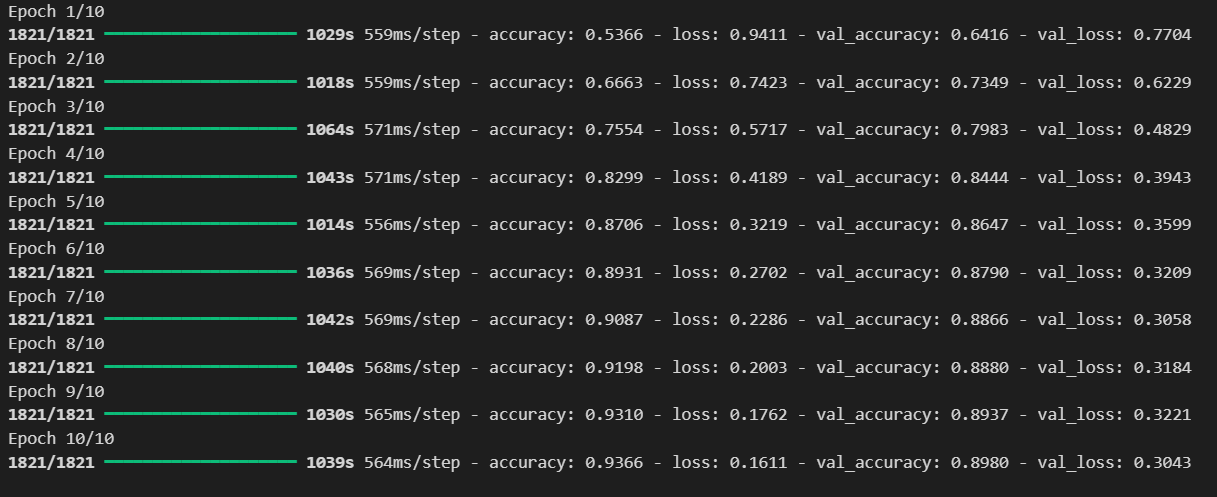

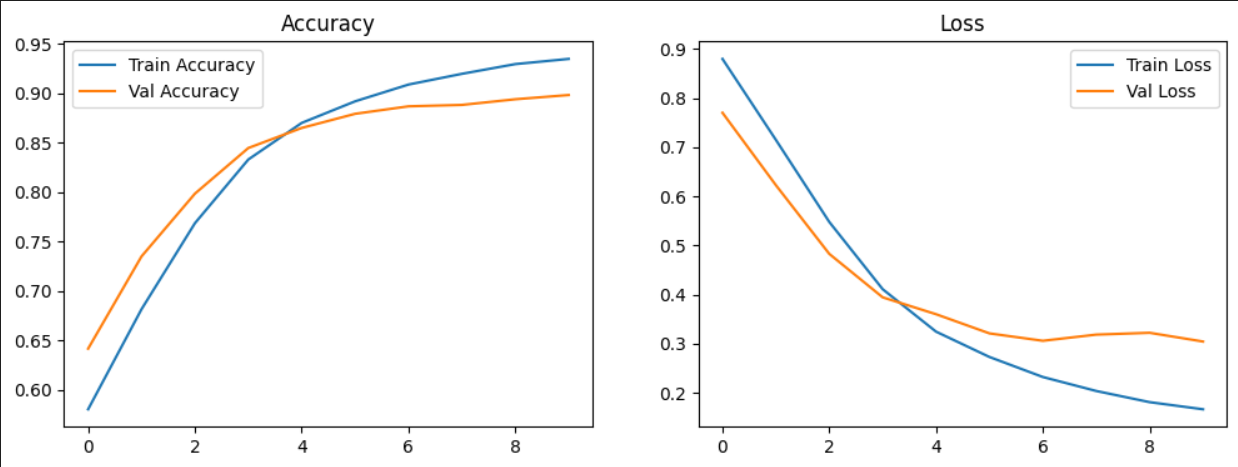

In [12]:
from tensorflow import keras
bilstm_model = keras.models.load_model('/kaggle/input/sentmodels/keras/default/1/bilstmModel.h5')


219/219 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step
Model Accuracy: 0.8980
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      2129
           1       0.91      0.90      0.91      3018
           2       0.89      0.87      0.88      1853

    accuracy                           0.90      7000
   macro avg       0.90      0.90      0.90      7000
weighted avg       0.90      0.90      0.90      7000



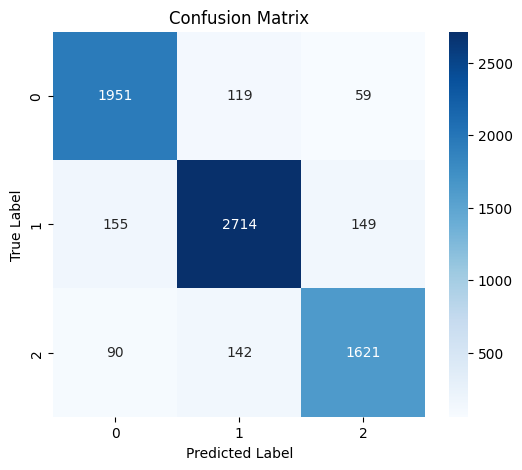

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = bilstm_model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_val, y_pred_classes))
conf_matrix = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [17]:
print("BiLSTM Prediction:", predict_text(bilstm_model, "This movie was great!"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
BiLSTM Prediction: 2


## Model 2 (GRU) Task 4

In [13]:
# ### Each model do architecture and train it also evaluate it on val_df and plot the accuracy then save the weights###
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Input
# from tensorflow.keras.layers import GlobalAveragePooling1D

# model = Sequential([
#     Input(shape=(100,)),
#     Embedding(input_dim=vocab_size,
#               output_dim=embedding_dim,
#               input_length=100,
#               weights=[embedding_matrix],
#               trainable=False),
#     GRU(units=256,return_sequences=True),
#     GlobalAveragePooling1D(),
#     Dropout(0.2),
#     Dense(units=64, activation='relu'),
#     Dropout(0.2),
#     Dense(units=3, activation='softmax')
# ])

# model.compile(
#     loss="sparse_categorical_crossentropy",
#     optimizer="adam",
#     metrics=["accuracy"]
# )


# # Model summary
# model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │       9,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 100, 256)            │         428,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,445,187 (36.03 MB)

 Trainable params: 445,187 (1.70 MB)

 Non-trainable params: 9,000,000 (34.33 MB)

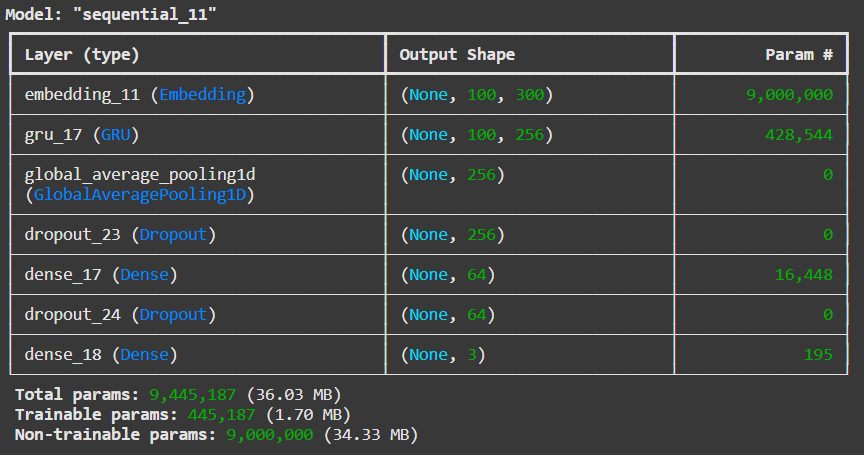

In [14]:
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     batch_size=32,
#     epochs=10,
#     verbose=1
# )


Epoch 1/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.5535 - loss: 0.9165 - val_accuracy: 0.6657 - val_loss: 0.7420
Epoch 2/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7088 - loss: 0.6644 - val_accuracy: 0.7660 - val_loss: 0.5606
Epoch 3/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8307 - loss: 0.4156 - val_accuracy: 0.7976 - val_loss: 0.4802
Epoch 4/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8916 - loss: 0.2696 - val_accuracy: 0.8321 - val_loss: 0.4562
Epoch 5/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9262 - loss: 0.1902 - val_accuracy: 0.8537 - val_loss: 0.4345
Epoch 6/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9421 - loss: 0.1519 - val_accuracy: 0.8561 - val_loss: 0.4738
Epoch 7/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9539 - loss: 0.1215 - val_accuracy: 0.8603 - val_loss: 0.5645
Epoch 8/10
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9566 - loss: 0

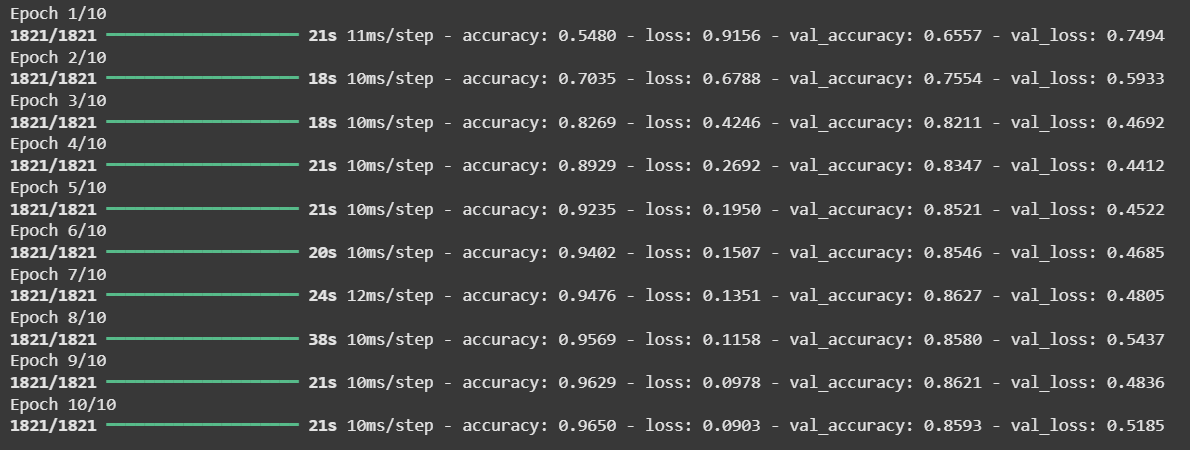

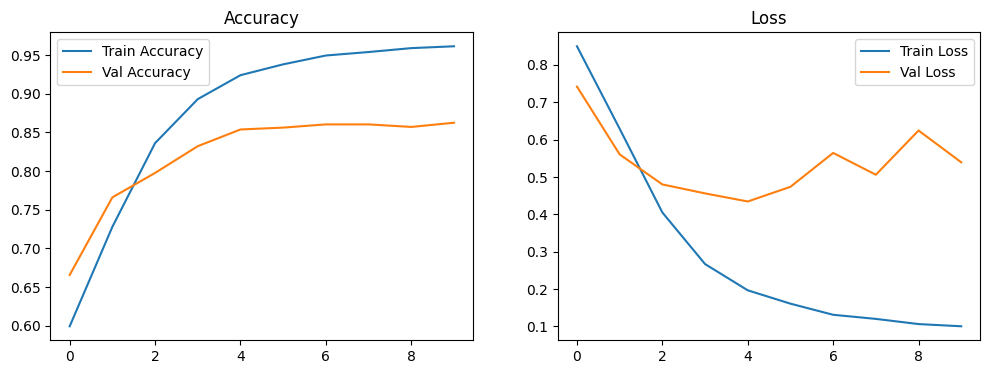

In [15]:
plot_history(history)

In [18]:
from tensorflow import keras
gru_model = keras.models.load_model('/kaggle/input/sentmodels/keras/default/1/sentiment_model.h5')


219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step
Model Accuracy: 0.8593
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2129
           1       0.84      0.90      0.87      3018
           2       0.87      0.80      0.83      1853

    accuracy                           0.86      7000
   macro avg       0.86      0.85      0.86      7000
weighted avg       0.86      0.86      0.86      7000



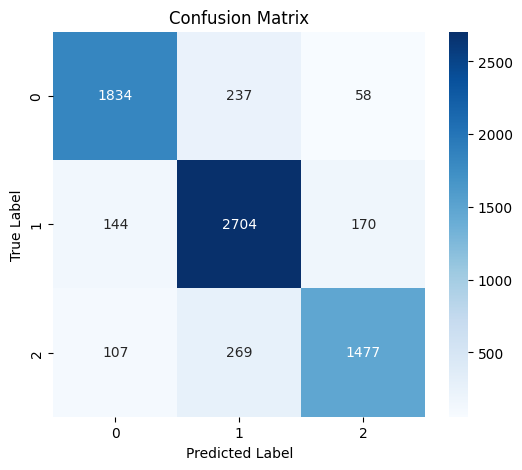

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = gru_model.predict(X_val)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_val, y_pred_classes))
conf_matrix = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [33]:
print("GRU Prediction:", predict_text(gru_model, "you are the best"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
GRU Prediction: 2


## Model 3 BERT Fine-tuned Task 5

In [ ]:
####Function to train the model####
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_dataset, val_dataset, epochs=3, batch_size=16, learning_rate=2e-5):
    # Dataloaders
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    model.to(device)
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    num_training_steps = epochs * len(train_dataloader)
    scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

    for epoch in trange(epochs, desc="Epochs"):
        # ---- TRAIN ----
        model.train()
        total_train_loss = 0

        for batch in train_dataloader:
            b_input_ids = batch['input_ids'].to(device)
            b_attention_mask = batch['attention_mask'].to(device)
            b_labels = batch['Sentiment'].to(device)

            model.zero_grad()
            outputs = model(input_ids=b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
            loss = outputs.loss
            total_train_loss += loss.item()

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()

        avg_train_loss = total_train_loss / len(train_dataloader)

        # ---- VALIDATE ----
        model.eval()
        val_labels = []
        val_preds = []

        with torch.no_grad():
            for batch in val_dataloader:
                b_input_ids = batch['input_ids'].to(device)
                b_attention_mask = batch['attention_mask'].to(device)
                b_labels = batch['Sentiment'].to(device)

                outputs = model(input_ids=b_input_ids, attention_mask=b_attention_mask)
                logits = outputs.logits
                predictions = torch.argmax(logits, dim=-1)

                val_preds.extend(predictions.cpu().numpy())
                val_labels.extend(b_labels.cpu().numpy())

        val_accuracy = accuracy_score(val_labels, val_preds)
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_train_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")

    return model

In [ ]:
#####Training the model#####
dataset = load_dataset('csv', data_files={'train': '/kaggle/input/sentdata/full_sentiment_data_train.csv', 'validation': '/kaggle/input/sentdata/full_sentiment_data_test.csv'})
def is_valid(example):
    return example['Text'] is not None and example['Text'].strip() != "" and example['Sentiment'] is not None

dataset['train'] = dataset['train'].filter(is_valid)
dataset['validation'] = dataset['validation'].filter(is_valid)
print(dataset)

from transformers import BertTokenizer

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

def tokenize_function(batch):
    return tokenizer(
        batch["Text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

# Tokenize datasets
tokenized_train = dataset['train'].map(tokenize_function, batched=True)
tokenized_val = dataset['validation'].map(tokenize_function, batched=True)

tokenized_train.set_format("torch", columns=["input_ids", "attention_mask", "Sentiment"])
tokenized_val.set_format("torch", columns=["input_ids", "attention_mask", "Sentiment"])

from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

trained_model = train_model(model, tokenized_train, tokenized_val, epochs=3, batch_size=16, learning_rate=2e-5)

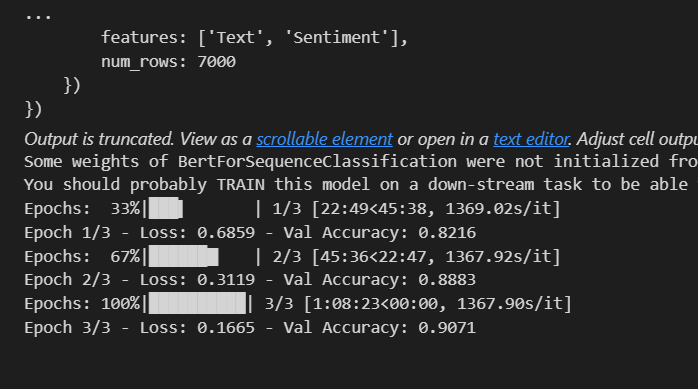

In [ ]:
# Save directory (you can change it)
save_path = "./sentiment_model"

# Save model and tokenizer
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

In [ ]:
def predict_sentiment(texts, model, tokenizer, device='cuda' if torch.cuda.is_available() else 'cpu'):
    if isinstance(texts, str):
        texts = [texts]  # Convert single string to list

    model.eval()
    model.to(device)

    # Tokenize input texts
    encoded = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model(**encoded)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

    return predictions.cpu().numpy()

In [ ]:
test_texts = [
    "The package arrived on time.",
    "It works as expected.",
    "I used the product for a few days.",
    "This is the third time I’ve ordered it.",
    "The event took place yesterday as planned.",
    "It’s a regular Tuesday.",
    "The meeting started at 10 AM.",
    "It does what it says on the box.",
    "The update was installed successfully.",
    "The device is neither fast nor slow."
    
]

preds = predict_sentiment(test_texts, trained_model, tokenizer)
print(preds)  # Example output: [2 1 0]

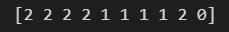

## Translating

In [ ]:
from deep_translator import GoogleTranslator

def translate_text(text, src="ar", dest="en"):
    return GoogleTranslator(source=src, target=dest).translate(text)

In [ ]:
def translate_and_predict_bilstm(texts, model, tokenizer, max_len=128):
    if isinstance(texts, str):
        texts = [texts]

    # Step 1: Translate Arabic to English
    translated = [translate_text(text) for text in texts]

    # Step 2: Tokenize (convert words to sequences of ints)
    sequences = tokenizer.texts_to_sequences(translated)

    # Step 3: Pad sequences
    padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

    # Step 4: Predict
    predictions = model.predict(padded)
    predicted_labels = predictions.argmax(axis=1)

    return predicted_labels, translated

In [ ]:
arabic_texts = [
    "الخدمة كانت ممتازة جداً.",
    " العمل كان سئ.",
    "عادي جداً ولا يوجد ما يميّزه."
    "الخدمة سيئة للغاية ولم أستفد شيئًا.",
    "لم يكن المنتج كما تم وصفه على الموقع.",
    "تجربة سيئة ولن أكررها.",
    "وصل الطلب متأخرًا وبحالة سيئة.",
    "أنصح بعدم الشراء من هذا المكان.",
    "مضيعة للوقت والمال.",
    "المنتج توقف عن العمل بعد يومين فقط.",
    "الدعم الفني بطيء وغير فعال.",
    "لا يستحق السعر المدفوع نهائيًا.",
    "الموظفون غير متعاونين إطلاقًا."
]

preds, translated = translate_and_predict_bilstm(arabic_texts,gru_model , tokenizer)

label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
readable_preds = [label_map[p] for p in preds]

for ar, en, pred in zip(arabic_texts, translated, readable_preds):
    print(f"AR: {ar}\nEN: {en}\nSentiment: {pred}\n")

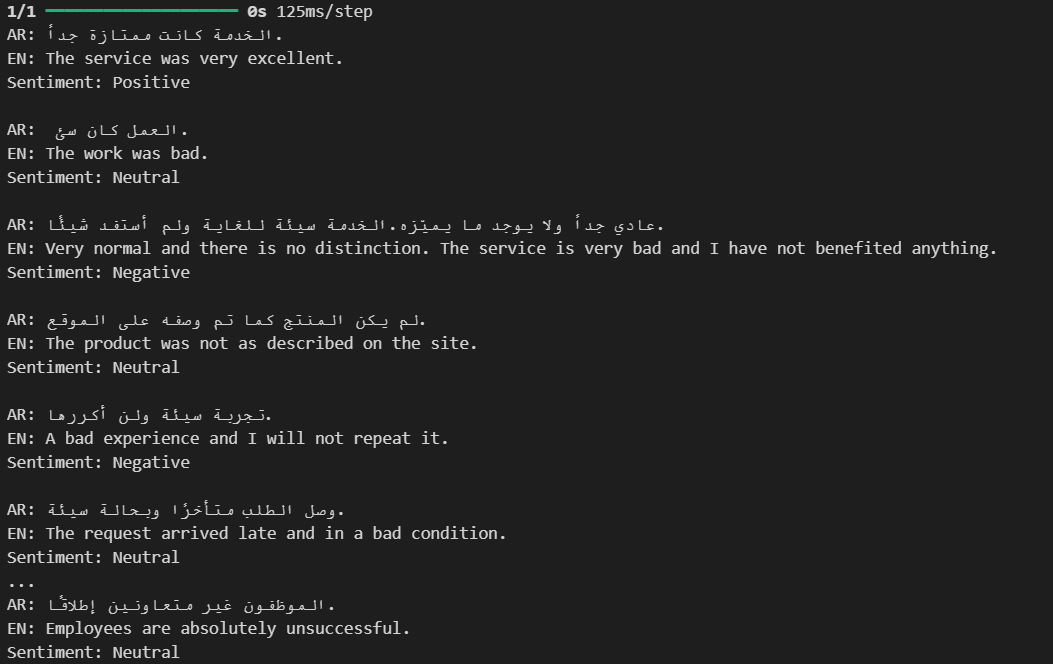

In [ ]:
!pip install transformers datasets scikit-learn
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from transformers import BertForSequenceClassification, BertTokenizer
save_path = "/kaggle/input/sentimentanalysis"
# Load from the saved folder
loaded_model = BertForSequenceClassification.from_pretrained(save_path)
loaded_tokenizer = BertTokenizer.from_pretrained(save_path)

# Move model to device if needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

In [ ]:
import torch
def translate_and_predict_deep(texts, model, tokenizer, device='cuda' if torch.cuda.is_available() else 'cpu'):
    if isinstance(texts, str):
        texts = [texts]

    # Translate texts from Arabic to English
    translated = [translate_text(text, src="ar", dest="en") for text in texts]

    # Tokenize translated texts
    encoded = tokenizer(
        translated,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    ).to(device)

    # Predict
    model.eval()
    model.to(device)
    with torch.no_grad():
        outputs = model(**encoded)
        predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

    return predictions, translated

In [ ]:
arabic_texts = [
       "المنتج رائع جدًا وتجاوز توقعاتي.",
    "الخدمة ممتازة والتوصيل سريع.",
    "أحببت التجربة وسأكررها بالتأكيد.",
    "التعامل كان راقيًا ومحترفًا.",
    "سعيد جدًا بالجودة والسعر مناسب.",
    
    # Neutral
    "تجربة عادية لا أكثر ولا أقل.",
    "لم يكن هناك شيء مميز أو سيء.",
    "وصل في الوقت المحدد، كل شيء طبيعي.",
    "استخدمت المنتج مرة واحدة فقط.",
    "ما زلت أجربه، لا يمكنني الحكم الآن.",
    
    # Negative
    "المنتج سيء جدًا وخيبة أمل كبيرة.",
    "وصل تالفًا ولا يعمل كما يجب.",
    "خدمة العملاء لم تساعدني أبدًا.",
    "أشعر أنني أهدرت أموالي.",
    "تجربة سيئة ولن أكررها."
]

preds, translations = translate_and_predict_deep(arabic_texts, loaded_model, loaded_tokenizer)

for i in range(len(arabic_texts)):
    print(f"Arabic: {arabic_texts[i]}")
    print(f"Translated: {translations[i]}")
    print(f"Predicted Label: {preds[i]}")
    print("---")

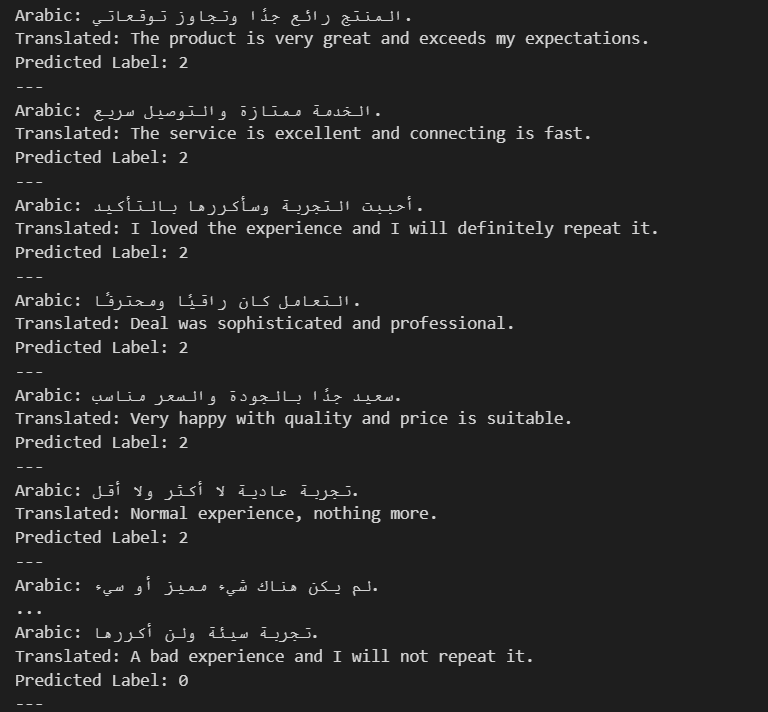

## Audio and Text

In [ ]:
def convert_audio_to_wav(input_audio_path):
    output_audio_path = f"converted_{uuid.uuid4().hex}.wav"
    command = [
        "ffmpeg",
        "-y",  # overwrite if exists
        "-i", input_audio_path,
        "-acodec", "pcm_s16le",
        "-ac", "1",               # mono channel
        "-ar", "16000",           # 16k sample rate
        output_audio_path
    ]
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    return output_audio_path
    
import os
import torch
import speech_recognition as sr
from deep_translator import GoogleTranslator

def translate_and_predict_deep_audio_smart(audio_file, model, tokenizer, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Convert audio to WAV format if needed
    converted_audio = convert_audio_to_wav(audio_file)

    recognizer = sr.Recognizer()
    with sr.AudioFile(converted_audio) as source:
        audio = recognizer.record(source)

    text = None
    detected_lang = None

    # Step 1: Try recognizing as Arabic first
    try:
        text = recognizer.recognize_google(audio, language="ar")
        detected_lang = "ar"
    except sr.UnknownValueError:
        print("🟡 Arabic recognition failed, trying English...")

    # Step 2: Try English if Arabic failed
    if detected_lang is None:
        try:
            text = recognizer.recognize_google(audio, language="en")
            detected_lang = "en"
        except sr.UnknownValueError:
            print("❌ Could not understand audio in either Arabic or English.")
            os.remove(converted_audio)
            return None, None

    print(f"📝 Recognized Text: {text} (Detected Language: {detected_lang})")

    # Step 3: Translate and Predict
    if detected_lang == "ar":
        # Translate Arabic to English
        translated_text = GoogleTranslator(source='ar', target='en').translate(text)
        print(f"🌍 Translated: {translated_text}")

        # Predict using translated English text
        encoded = tokenizer(
            [translated_text],
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors="pt"
        ).to(device)

        model.eval()
        model.to(device)
        with torch.no_grad():
            outputs = model(**encoded)
            prediction = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
        translated_text = [translated_text]
    else:
        # Predict directly in English
        input_texts = [text]
        encoded = tokenizer(
            input_texts,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors="pt"
        ).to(device)

        model.eval()
        model.to(device)
        with torch.no_grad():
            outputs = model(**encoded)
            prediction = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
        translated_text = input_texts

    # Optional: delete temp WAV file
    os.remove(converted_audio)

    return prediction, translated_text

In [ ]:
pred, trans_text = translate_and_predict_deep_audio_smart(
    audio_file="/kaggle/input/speech-test/AI.mp3",
    model=loaded_model,
    tokenizer=loaded_tokenizer
)

print("✅ Prediction:", pred)
print("📝 Final Processed Text:", trans_text)

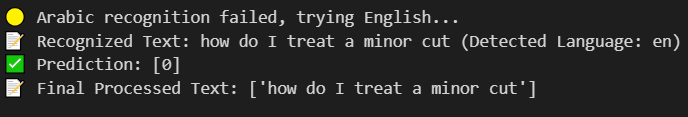

## Deploying Locally on streamlit